# Project scoping
## Goals:
Perform EDA on the GDP/Life Expectancy data set and draw conclusions about the relationships in the dataset
## Steps:
1. Set-up: load packages and data
2. Initial exploration: look at dataset, descibe data, summary stats
3. Draw conclusions from inital exploration
4. Univariate analysis through visualizations
5. Draw conclusions from univariate analysis
6. Multivariate analysis through visualizaions
7. Draw conclusions from multivariate analysis

## Step 1: Set-up: load packages and data

In [46]:
#load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [48]:
#read in data
df = pd.read_csv('all_data.csv')

## Step 2: Initial exploration: look at dataset, descibe data, summary stats

In [51]:
#inspect data
print(df.head())
print(df.dtypes)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


In [53]:
#change Year to be a date type
#change long column name to be shorter
df['Year'] = df.Year.apply(lambda x: dt.date(month = 1, day = 1, year = x))
df.rename(columns={'Life expectancy at birth (years)': 'LE'}, inplace=True)

print(df.head())

  Country        Year    LE           GDP
0   Chile  2000-01-01  77.3  7.786093e+10
1   Chile  2001-01-01  77.3  7.097992e+10
2   Chile  2002-01-01  77.8  6.973681e+10
3   Chile  2003-01-01  77.9  7.564346e+10
4   Chile  2004-01-01  78.0  9.921039e+10


In [55]:
#describe data
print(df.describe(include='all'))
print(df.info())

       Country        Year         LE           GDP
count       96          96  96.000000  9.600000e+01
unique       6          16        NaN           NaN
top      Chile  2000-01-01        NaN           NaN
freq        16           6        NaN           NaN
mean       NaN         NaN  72.789583  3.880499e+12
std        NaN         NaN  10.672882  5.197561e+12
min        NaN         NaN  44.300000  4.415703e+09
25%        NaN         NaN  74.475000  1.733018e+11
50%        NaN         NaN  76.750000  1.280220e+12
75%        NaN         NaN  78.900000  4.067510e+12
max        NaN         NaN  81.000000  1.810000e+13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     object 
 2   LE       96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), object(2)
memory usage: 3.

## Step 3: Draw conclusions from inital exploration
* the data includes 6 countries and 16 years
* the life expectancy mean is less than the 25th percentile indicating that it's skewed to the low side and that there are potentially low outliers. this is supported by the min value of 44.3 years while the bulk of the data in the IQR spans 74.5 - 78.9 years.
* GDP on the other hand, seems to be skewed right (to the high side). the mean is almost 2x higher than the median (3.9 T vs. 1.3 T). the data also seems to be really spread out because the std is greater than the mean; 5.2 T std vs 3.9 T mean.

## Step 4: Univariate analysis through visualizations

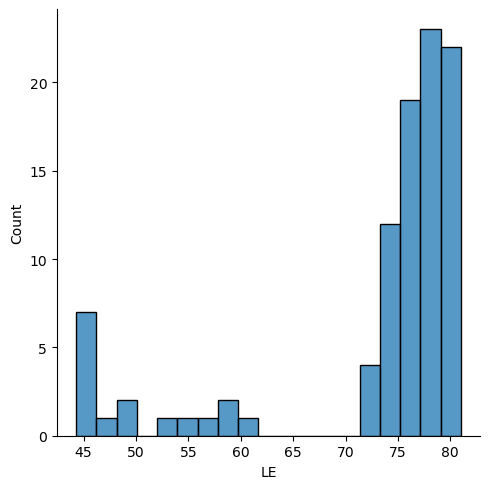

<Figure size 640x480 with 0 Axes>

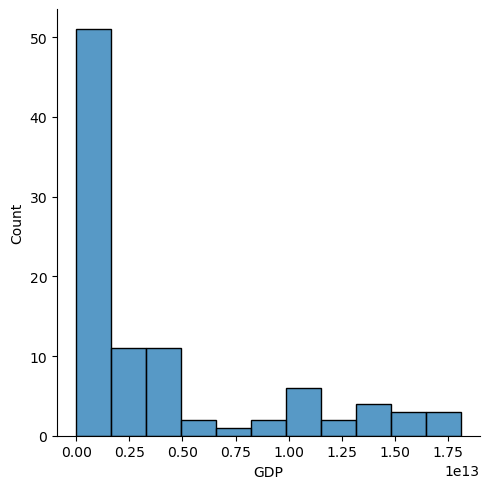

In [65]:
sns.displot(df.LE)
plt.show()
plt.clf()

sns.displot(df.GDP)
plt.show()

## Step 5: Draw conclusions from univariate analysis
* the LE dist plot shows a bi-modal distribution with one mode near 78 years and a second, smaller mode near 45.
* the GDP dist plot shows that most of the data is concentrated 0-0.5 T with a very long right tail


## Step 6: Multivariate analysis through visualizaions

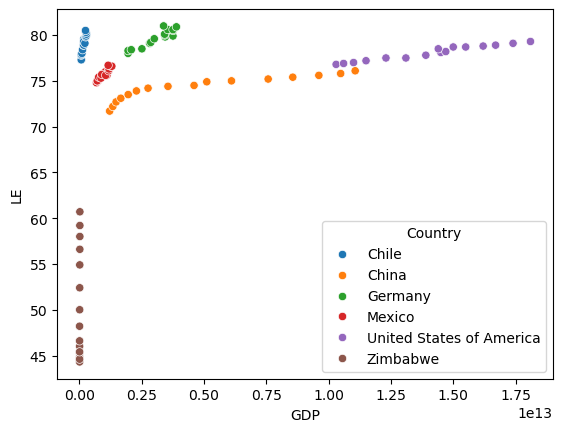

<Figure size 640x480 with 0 Axes>

In [78]:
sns.scatterplot(x='GDP', y='LE', data=df, hue='Country')
plt.show()
plt.clf()

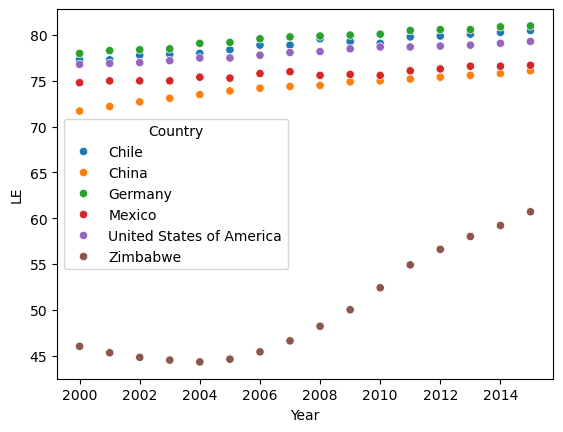

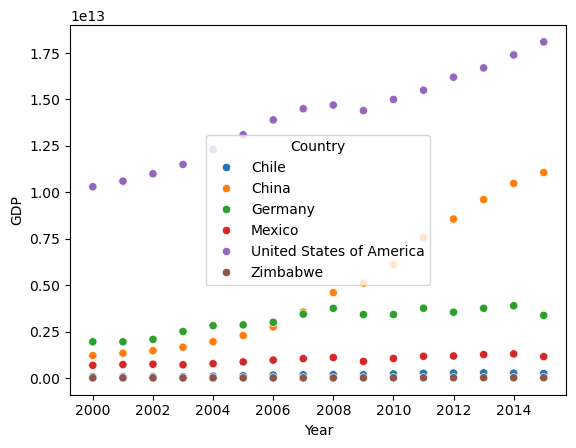

In [72]:
sns.scatterplot(x='Year', y='LE', data=df, hue='Country')
plt.show()
plt.clf()

sns.scatterplot(x='Year', y='GDP', data=df, hue='Country')
plt.show()
plt.clf()

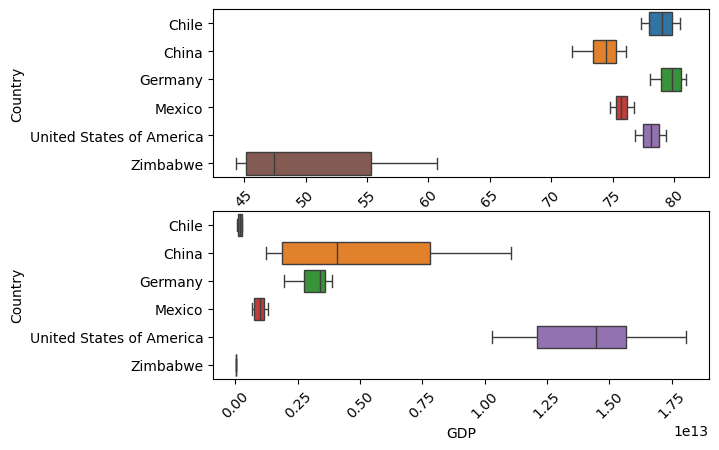

In [96]:
plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='LE', y='Country', hue='Country')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='GDP', y='Country', hue='Country')
plt.xticks(rotation=45)
plt.show()
plt.clf()

## Step 7: Draw conclusions from multivariate analysis